In [ ]:
########## Code documentation with well explanation  ###########

In [ ]:
## Problem Identification
    
# Breast cancer represents one of the world's most widespread and dangerous conditions so better diagnostic approaches and treatment methods for management are needed urgently. 
# Treatment of breast cancer faces an essential challenge to deliver specific care that addresses each patient's individual disease characteristics and unique progression patterns. 
# Standard statistical methodologies deliver important results yet their capacity to detect intricate patterns in extensive datasets remains restricted.
# The accomplishment of precision and efficiency standards requires the application of classification and clustering methods. 
# Through classification techniques medical professionals can forecast patient outcomes including recovery and relapse rates and treatment requirements through the combination of genetic profiles with clinical histories and treatment response information. 
# The clustering approach allows healthcare providers to organize patients into distinctive subgroups through multiple comparisons of cancer progression together with surgery types and biological markers. 
# Through these analytical methods researchers can develop specialized interventions while improving patient care while driving advancements in precision medicine approaches.

## Machine learning approach to predictive solution
    
# AI methods used in breast cancer medicine optimize prediction accuracy and develop clustered treatment systems for personalized care while navigating complex dimensional datasets. 
# These analytical methods trace hidden connections in multidimensional datasets to both generate treatment advancements and optimize operational resources which collectively support collaborative medical research for enhancing healthcare delivery to vulnerable patients.

In [ ]:
#dataset downloaded at kaggle - https://www.kaggle.com/datasets/amandam1/breastcancerdataset

In [17]:
#importing necessary libraries
#The code employs pandas and Numpy for optimized data management while using sklearn for machine learning and matplotlib
#seaborn for visualizations and datetime for date-time operation automation

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [21]:
# Load dataset, function of preprocess
def preprocess_data(data):
    # handling missing value
    #Normalize Date_of_Last_Visit and Date_of_Surgery into datetime values while converting unknown or error values into null entries through errors='coerce. 
    #Procedure Time_Since_Surgery calculation occurs while Patient_Status receives "Unknown" as a value substitution for empty fields.
    data['Date_of_Last_Visit'] = pd.to_datetime(data['Date_of_Last_Visit'], errors='coerce')
    data['Date_of_Surgery'] = pd.to_datetime(data['Date_of_Surgery'], errors='coerce')
    data['Time_Since_Surgery'] = (data['Date_of_Last_Visit'] - data['Date_of_Surgery']).dt.days.fillna(0)
    data['Patient_Status'] = data['Patient_Status'].fillna('Unknown')

    #encoding categorical features or variables
    #The application of LabelEncoder transforms Gender and Tumour_Stage classification data into numbers which satisfies machine learning requirements without compromising key categorical details.
    categorical_columns = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type', 'Patient_Status']
    for col in categorical_columns:
        data[col] = LabelEncoder().fit_transform(data[col])

    # Dropping non-essential columns
    #The analysis and prevention of data leakage will benefit from dropping Date_of_Surgery, Date_of_Last_Visit and Patient_ID in addition to redundant columns.
    data.drop(['Patient_ID', 'Date_of_Surgery', 'Date_of_Last_Visit'], axis=1, inplace=True)

    return data

In [23]:
# Classification Task
#Classification operations are conducted using Random Forest followed by hyperparameter optimization and evaluation leading to result visualization.
# X - independent variables (features of the dataset), y - dependent variables (Labels of the datasets)
def perform_classification(X, y):
    # Split data into training and testing sets
    #The set-up splits data into training and testing components where the testing portion reaches 20% while keeping experimental results reproducible.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define hyperparameter grid for Random Forest
    # The code uses tuning to optimise the hyperparameter space for Random Forest performance.
    # The parameter grid features four tuning elements: n_estimators, max_depth min_samples_split and min_samples_leaf.
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    # Grid search for hyperparameter tuning
    # The framework employs GridSearchCV and RandomForestClassifier to execute parameter optimization through cross-validated accuracy.
    clf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # The application outputs the optimal model through grid_search.best_estimator_ together with the best hyperparameters through best_params_.
    best_clf = grid_search.best_estimator_
    print(f"Best Hyperparameters: {grid_search.best_params_}")
   
    # Train and predict with the best model in the process, like class labels and probabilities.
    best_clf.fit(X_train, y_train)
    y_pred = best_clf.predict(X_test)
    y_proba = best_clf.predict_proba(X_test)
    
    # Evaluate Classification Model
    # We measure prediction performance by evaluating accuracy while simultaneously calculating precision and recall metrics and calculating F1-score values.
    # The combination of precision and recall presented in the F1-score provides an optimal balance which addresses imbalances whereas recall measures true positive rates.
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Compute ROC AUC score
    # ROC-AUC computation uses label_binarize together with One-vs-Rest (multi_class='ovr') approach for multi-class prediction models.
    # For binary cases, it extracts positive class probabilities (y_proba[:, 1]) to calculate ROC-AUC accurately.
    if len(set(y)) > 2:  # Multi-class case
        y_test_binarized = label_binarize(y_test, classes=np.unique(y))
        roc_auc = roc_auc_score(y_test_binarized, y_proba, multi_class='ovr', average='weighted')
    else:  # Binary case
        roc_auc = roc_auc_score(y_test, y_proba[:, 1])

    # printing classification metrics such as accuracy, precision, recall, f1-score, and ROC-AUC.
    print("Classification Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")

    # Confusion Matrix
    # The implementation visualizes the confusion matrix through heatmap generation by using confusion_matrix and sns.heatmap methods.
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    # The ROC curve allows visualization of classifier discrimination while distinguishing between single-binary and multi-class curve types.
    if len(set(y)) > 2:  # Multi-class case
        for i, class_label in enumerate(np.unique(y)):
            fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=np.unique(y))[:, i], y_proba[:, i])
            plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")
    else:  # Binary case
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# Through the provided dataset features (X) and labels (y) the model executes both multi-class and binary classification tasks.
# A framework that employs Grid Search optimization discovers optimal random forest model parameters to reach performance excellence.
# The evaluation method provides comprehensive performance measurements by determining accuracy together with precision, recall, F1-score and ROC-AUC for robust assessment.
# The system presents results utilizing confusion matrix heatmaps and ROC curves which enhances understanding of classifier discrimination performance.

In [7]:
# Clustering Task with Fine-Tuning
# The application uses K-Means clustering followed by Silhouette Score optimization and displays extracted clusters through 2D PCA visualization.
def perform_clustering(X):
    # Determine the optimal number of clusters using the Silhouette Score
    # Performance evaluation of K-Means occurs through testing multiple cluster counts from 2 to 9 by specifying cluster_range = range(2, 10).
    # With the specified number of clusters as input K-Means performs model fitting to allocate points within clusters.
    # The Silhouette Score evaluation assesses cluster performance through cohesion and separation to establish better groupings for each configuration.
    # Our program keeps Silhouette Scores and displays results for distinct cluster values to find the most suitable cluster number.
    silhouette_scores = []
    cluster_range = range(2, 10)

    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(X)
        sil_score = silhouette_score(X, clusters)
        silhouette_scores.append(sil_score)
        print(f"Silhouette Score for {n_clusters} clusters: {sil_score:.2f}")

    # Optimal number of clusters
    # The Silhouette Score attains its maximum value using np.argmax to identify the best cluster configuration index.
    # The program determines and displays the best cluster quantity by mapping values from the index to the cluster range
    optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
    print(f"Optimal number of clusters: {optimal_clusters}")

    # Apply KMeans with optimal clusters
    # A K-Means model runs with the optimal cluster count set to optimal_clusters and a random state of 42 for precise clustering.
    # The model fits dataset X to its clusters before storing the results in clusters.
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)

    # Visualize Clusters using PCA
    # PCA receives n_components=2 for dataset dimensional reduction which enables two-dimensional space visualization.
    # The PCA transformation of the dataset occurs using pca.fit_transform(X) which stores its resulting 2D data in X_pca.
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # An easy-to-read scattershot presents data points using the first two principal components with cluster assignment colours.
    # The scatter plot features clusters identified by c=clusters and highlighted through cmap='viridis' chart displaying 60% opacity.
    # The title of the plot receives its designation together with cluster-specific information to enhance visualization clarity.
    # Monoaxial labels designate the axes "Principal Component 1" and "Principal Component 2" for description of dimensionality.
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
    plt.title(f'K-Means Clustering with {optimal_clusters} Clusters (PCA Reduced)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


# The experiment conducts Silhouette Score calculations on multiple cluster count settings from 2 to 9 to determine clustering outcome quality.
# The method chooses an optimal cluster number when it detects the configuration producing the maximum Silhouette score.
# Applics K-Means clustering following the selection of the optimal cluster quantity which delivers the most suitable fit for the dataset.
# PCA algorithms minimize datasets to 2 dimensions so researchers can observe clustered data as 2D points in a visual representation.
# The data visualization generates a two-dimensional scatter plot displaying clusters using point colors which represent the cluster membership of each observation.
# The plot receives assessment labels and a title addition alongside the proper cluster count to enhance readability.


# Through unsupervised learning algorithms K-Means Clustering organizes data entries into k clusters that share matching features to reveal patterns within the data set.
# Clustering quality assessment depends on Silhouette Score which rates cluster quality based on data points' similarities to their cluster members compared to cluster differences. Higher-scoring models represent effective clustering.
# Principal Component Analysis implements a transformation process that simplifies multidimensional data understanding by reconstructing coordinate systems according to variance distribution patterns. This method facilitates clear visualization of complex high-dimensional data while maintaining accessible dimensions.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8808\1631937304.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date_of_Last_Visit'] = pd.to_datetime(data['Date_of_Last_Visit'], errors='coerce')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8808\1631937304.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date_of_Surgery'] = pd.to_datetime(data['Date_of_Surgery'], errors='coerce')


=== Classification Task with Fine-Tuning ===
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Classification Metrics:
Accuracy: 0.82
Precision: 0.68
Recall: 0.82
F1-Score: 0.75
ROC-AUC: 0.67


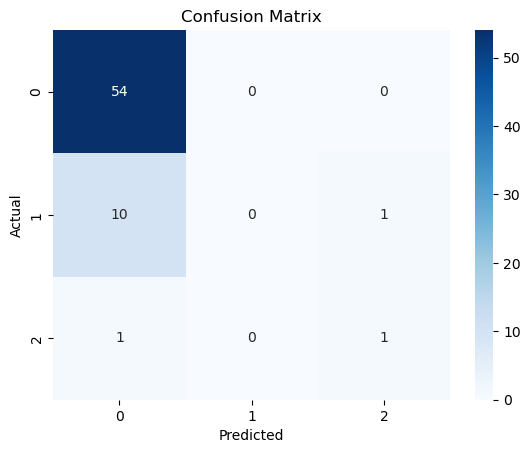

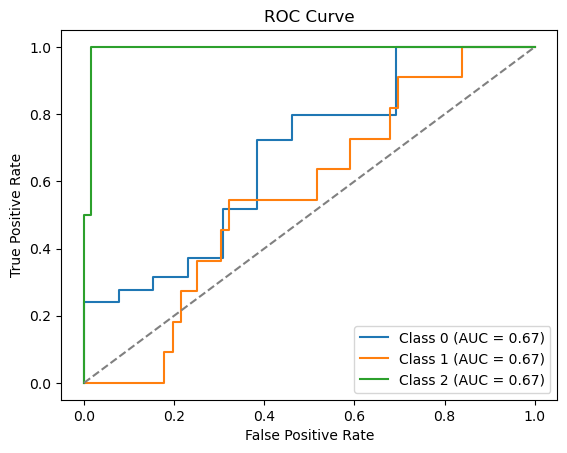


=== Clustering Task with Fine-Tuning ===
Silhouette Score for 2 clusters: 0.11
Silhouette Score for 3 clusters: 0.09
Silhouette Score for 4 clusters: 0.09
Silhouette Score for 5 clusters: 0.10
Silhouette Score for 6 clusters: 0.12
Silhouette Score for 7 clusters: 0.11
Silhouette Score for 8 clusters: 0.12
Silhouette Score for 9 clusters: 0.12
Optimal number of clusters: 6


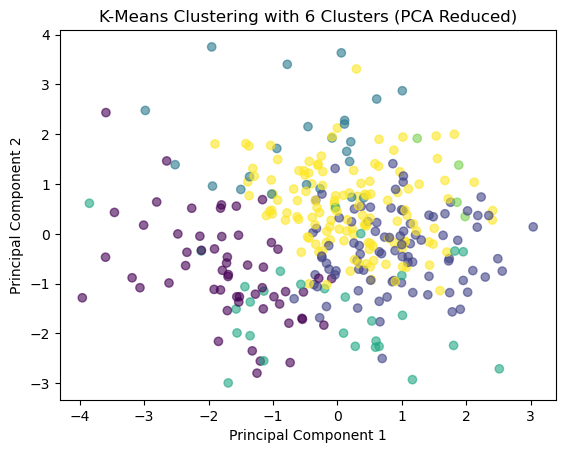

In [25]:
# Main Workflow

# In most cases this statement marks the beginning of the execution flow for the script. 
# When scripts execute directly this code block operates but it remains inactive when modules get imported. 
# A startup block prevents workflow execution until a script gets direct program execution.
if __name__ == "__main__":
    #BRCA dataset read (changed the name as breast_cancer_data.csv for easiness of catching the content). it's from kaggle, url on top.
    # Pandas' pd.read_csv() functionality uploads the dataset as a DataFrame to perform convenient data analysis.
    # The pd.read_csv() function loads data from its identified CSV file while generating a structurally organized DataFrame.
    # All data comes from an assessment file called 'breast_cancer_data.csv' which presents patient status ('Patient_Status') among other properties ('tumor size').
    data = pd.read_csv('breast_cancer_data.csv')

    # The preprocess_data(data) function runs to process the dataset by managing missing values while performing data cleaning operations.
    # The function transforms categorical variables followed by normalization or scaling of features to fulfil machine learning requirements.
    # The preprocessing work enhances the dataset so it becomes better suited for classification as well as clustering which enhances the model's performance level and accuracy.
    data = preprocess_data(data)

    # After splitting the data it arranges feature variables into X and target variables into y for modeling.
    # Data.prep.dump('Patient_Status', axis = 1) function removes the target column while keeping all feature columns in X.
    # The 'Patient_Status' column extraction from data becomes the classification target variable y.
    X = data.drop('Patient_Status', axis=1)
    y = data['Patient_Status']

    # Scale data for clustering
    # Feature standardization adjusts their values to achieve mean 0 alongside standard deviation 1.
    # StandardScaler() from sklearn preprocessing module scales feature data before applying normalization techniques for increased data consistency.
    # Using scaler.fit_transform(X) produces scale coefficients from the mean and standard deviation which apply to transform the data.
    # X_scaled contains the standardized features which maintain their comparison value.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform Classification with Fine-Tuning
    # The algorithm displays an introductory announcement before the machine learning operation begins to inform users about process commencement.
    # The perform_classification(X_scaled,y) function executes classification while tuning hyperparameters by taking scaled features combined with labels.
    # Random Forest classification executes while extracting performance data by ROC-AUC in addition to accuracy, precision, recall and F1-score metrics.
    print("=== Classification Task with Fine-Tuning ===")
    perform_classification(X_scaled, y)

    # Perform Clustering with Fine-Tuning
    # The program outputs a starting message for clustering tasks to signpost the execution of clustering processing.
    # performance_clustering function applies K-means clustering to X_scaled data while optimizing cluster quantity
    # Through PCA dimensionality reduction the visualization examines cluster results in 2D form for effective explanation of data results.
    print("\n=== Clustering Task with Fine-Tuning ===")
    perform_clustering(X_scaled)



# Dataset Loading: The breast_cancer_data.csv dataset is processed as a pandas DataFrame by the program.
# Data Preprocessing: The preprocess_data() metric validates data readiness by performing cleaning functions on the dataset (missing value resolution followed by data scaling).
# Feature-Target Split: A split process separates dataset features (X) from the target variable (y) which includes independent variables in X and dependent variable Patient_Status in y.
# Scaling: StandardScaler transforms features so they achieve both a mean score of zero and a standard deviation of one.
# Classification: The perform_classification() function initiates the classification of the dataset following model refinement and performance assessment.
# Clustering: The perform_clustering() function generates cluster analysis on the dataset while adjusting the cluster count setting and visualizing the processed results.


# Classification: This system applies supervised learning to forecast patient class labels known as Patient_Status.
# Clustering: In this unsupervised learning approach data clusters form according to similarity patterns but without any implicit categorization.
# Preprocessing: Data preparation requires multiple necessary steps that prepare machine learning models by performing tasks such as scaling and handling missing data.